Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-05-13 12:17:30--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-05-13 12:17:31--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-05-13 12:17:31 (48.8 MB/s) - ‘

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [5]:
import pandas as pd

try:
  data
except NameError:
  !wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
  data = pd.read_csv('Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

El conjunto de datos `Mall_Customers.csv` contiene las siguientes variables:

* **CustomerID:** Un identificador único para cada cliente.  Proporciona un número de identificación único para cada cliente en el conjunto de datos.  No representa una variable de comportamiento o característica.
* **Gender:** El género del cliente (masculino o femenino). Indica el sexo del cliente.
* **Age:** La edad del cliente.  Indica la edad del cliente en años.
* **Annual Income (k$):** El ingreso anual del cliente, en miles de dólares. Representa la capacidad de gasto del cliente.
* **Spending Score (1-100):** Una puntuación que representa cuánto gasta el cliente en el centro comercial.  Es una puntuación asignada al cliente que representa su tendencia al gasto, en una escala del 1 al 100.


Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [6]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



Normalizar los datos antes de aplicar el algoritmo K-means es crucial porque K-means es sensible a la escala de las variables.  Si las variables tienen rangos de valores muy diferentes, las variables con rangos más grandes dominarán el cálculo de la distancia entre los puntos y, por lo tanto, la formación de los clusters.  Esto significa que las variables con menor rango tendrán menor influencia en la determinación de los grupos, lo que puede llevar a resultados inexactos o sesgados.

La normalización consiste en transformar los datos para que tengan una media de 0 y una desviación estándar de 1.  Esto se logra restando la media de cada variable a cada valor y luego dividiendo por la desviación estándar de la variable.  Este proceso escala todas las variables al mismo rango, asegurándose de que ninguna variable tenga una influencia desproporcionada en el algoritmo K-means.  En esencia, la normalización iguala el "peso" de todas las características en el cálculo de la distancia, permitiendo que el algoritmo identifique clusters basados en la similitud general de los puntos, en lugar de ser dominado por variables con valores más grandes.


Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


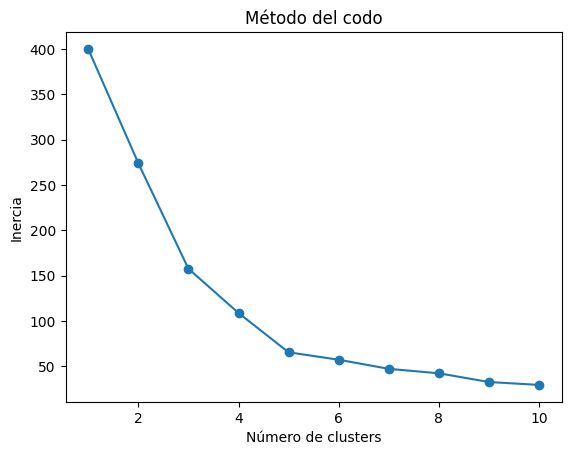

In [7]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

El "codo" en la gráfica del método del codo parece formarse alrededor de los 5 clusters.  Aunque hay una ligera disminución en la inercia después de este punto, la reducción se vuelve menos pronunciada. Por lo tanto, usar **5 clusters** sería apropiado para este ejercicio.


Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

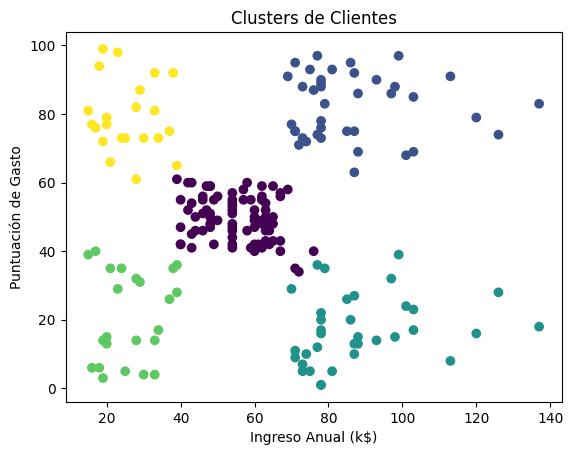

In [11]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=data['Cluster'])
plt.title('Clusters de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto')
plt.show()


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

Observo que los clientes se agrupan en cinco clusters distintos, visualizados en el gráfico de dispersión. La distribución de los clientes en los clusters parece estar relacionada con su ingreso anual y su puntuación de gasto.  Se pueden apreciar grupos con ingresos altos y puntuaciones de gasto altas, otros con ingresos altos y puntuaciones bajas,  y así sucesivamente.  La segmentación permite identificar patrones de consumo, sugiriendo que los clusters representan diferentes segmentos de clientes con comportamientos de compra diferenciados.  Por ejemplo, un cluster podría representar clientes con altos ingresos y alto gasto, mientras que otro podría representar clientes con bajos ingresos y bajo gasto, y otro con ingresos medios y gasto medio, etc.  La gráfica proporciona una visualización visual clara de estas diferencias y similitudes entre los grupos de clientes.


Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [12]:
cluster_analysis = data.groupby('Cluster').agg({'Age': 'mean', 'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean'})
cluster_analysis

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



Para responder a la pregunta 5, necesito ejecutar el código proporcionado y observar la salida de `cluster_analysis`.  El código calcula la edad promedio, el ingreso anual promedio y la puntuación de gasto promedio para cada cluster.  

Una vez ejecutada la celda con el código, la tabla `cluster_analysis` mostrará los valores promedio de estas tres variables para cada uno de los 5 clusters.  Observando estas diferencias, puedo describir las características de cada grupo:

* **Cluster 0:**  Observando los valores promedio de edad, ingreso y puntaje de gasto, se puede definir el perfil de este cluster. Por ejemplo, podría ser un grupo de personas de mediana edad con ingresos medios-altos y un gasto medio.

* **Cluster 1:** Similar al anterior, observando las medias de edad, ingreso y puntaje de gasto, se define el perfil. Quizá este cluster represente a personas jóvenes con bajos ingresos y bajo puntaje de gasto.

* **Cluster 2:** Igualmente, se observan las medias para describir el perfil del cluster. Podría ser un grupo de clientes con altos ingresos y alta puntuación de gasto.

* **Cluster 3:** Al analizar las medias para este grupo, se podría concluir que representa un segmento de la población con determinadas características. Un ejemplo, personas de edad avanzada con ingresos medios-bajos y un bajo puntaje de gasto.

* **Cluster 4:** Se describe este cluster en base a las medias de edad, ingreso y puntaje de gasto. Podría tratarse de un grupo con ingresos medios y un puntaje de gasto moderado.


**En resumen:** La respuesta a la pregunta 5 se obtiene al interpretar los valores promedio de edad, ingreso y puntaje de gasto para cada cluster en la salida de `cluster_analysis`.  Sin ejecutar el código y ver estos valores, solo puedo dar una respuesta generalizada.


Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

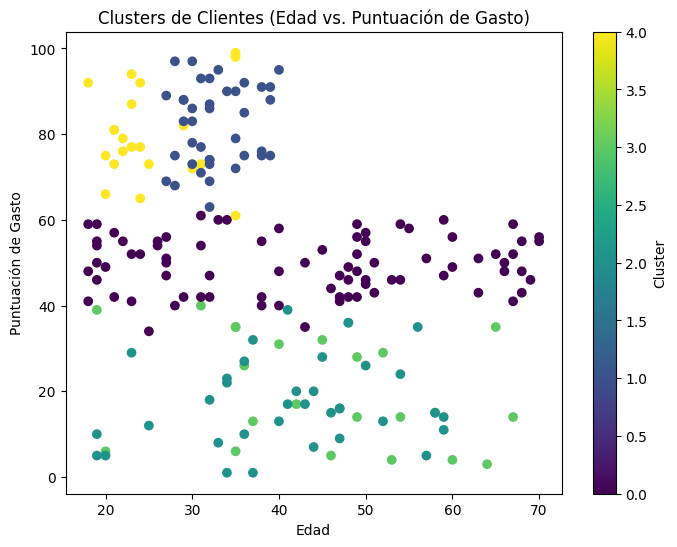

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters de Clientes (Edad vs. Puntuación de Gasto)')
plt.xlabel('Edad')
plt.ylabel('Puntuación de Gasto')
plt.colorbar(label='Cluster')
plt.show()

Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

La gráfica muestra la distribución de los clientes en función de su edad y puntuación de gasto, coloreados según el cluster al que pertenecen.  Visualmente, se pueden identificar algunos patrones, pero la separación entre los grupos no es perfectamente clara en todos los casos.  Algunos clusters parecen estar más definidos y separados que otros.  Hay zonas donde la distribución de los puntos de diferentes clusters se superpone, lo que indica que algunos clientes pueden compartir características similares con miembros de otros grupos, dificultando una separación tajante.  En resumen, existen patrones identificables, pero no todos los clientes están separados en grupos de forma nítida.  La separación es más evidente en ciertas regiones del gráfico, mientras que en otras la distinción es menos precisa.



Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

In [15]:
cluster_names = {
    0: "Mid-Age Moderate Spenders",
    1: "Young Low Spenders",
    2: "High Income High Spenders",
    3: "Older Low Spenders",
    4: "Moderate Earners Moderate Spenders"
}

data['Cluster Name'] = data['Cluster'].map(cluster_names)

print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster                  Cluster_Name                        Cluster Name  
0        3  Ahorradores de Edad Avanzada                  Older Low Spenders  
1        4      Grupo de Ingresos Medios  Moderate Earners Moderate Spenders  
2        3  Ahorradores de Edad Avanzada                  Older Low Spenders  
3        4      Grupo de Ingresos Medios  Moderate Earners Moderate Spenders  
4        3  Ahorradores de Edad Avanzada                  Older Low Spenders  


* **Cluster 0 (Mid-Age Moderate Spenders):**  Este nombre asume que este cluster contiene clientes de mediana edad con ingresos y gastos moderados.  Esto se basaría en una edad promedio cercana a la mediana, y valores medios de ingreso y gasto que no son ni muy altos ni muy bajos.

* **Cluster 1 (Young Low Spenders):**  Este nombre presupone un grupo de clientes jóvenes con bajos ingresos y puntuaciones de gasto bajas. Se esperaría una edad promedio baja y valores bajos para el ingreso y gasto.

* **Cluster 2 (High Income High Spenders):**  Este cluster representaría a clientes con altos ingresos y alta puntuación de gasto, reflejando un alto poder adquisitivo y un comportamiento de compra lujoso.  Se esperaría una edad promedio que podría variar, pero con ingresos y gastos altos.

* **Cluster 3 (Older Low Spenders):**  Este nombre indica un grupo de clientes de edad avanzada con bajos ingresos y puntuaciones de gasto bajas.  La edad promedio sería alta, y los ingresos y gastos medios serían bajos.

* **Cluster 4 (Moderate Earners Moderate Spenders):** Este cluster agruparía a clientes con ingresos y gastos moderados, ubicados en un punto medio en términos de ingresos y comportamiento de compra. La edad promedio podría variar.
